In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy.io import loadmat
import utils
grader = utils.Grader()

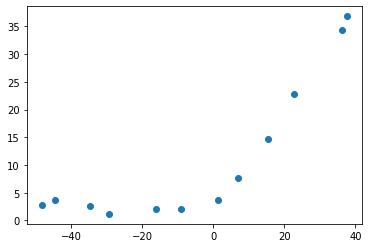

In [5]:
data = loadmat('/Users/advaithsai/ml-coursera/ex5/ex5data1.mat')
X, y = data['X'], data['y'][:,0]
Xval, yval = data['Xval'], data['yval'][:,0]
Xtest, ytest = data['Xtest'], data['ytest'][:,0]

m = y.shape[0]
plt.scatter(X,y)

In [0]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
  m = y.size
  J = 0 
  grad = np.zeros(theta.shape)
  def theta_sum(theta,m,lambda_):
    sum_ = np.sum(theta[1:]**2)
    return (sum_*lambda_)/(2*m)
  def compute_cost(X,y,m):
    h_x = np.zeros(m)
    sum_diff = 0
    for i in range(m):
      h_x[i] = np.dot(theta,X[i])
    sum_diff = np.sum((h_x-y)**2)
    return (sum_diff/(2*m))
  def computeGrad(X,y,j):
    h_x = np.zeros(m)
    sum_Gradient = 0
    for i in range(m):
      h_x[i] = np.dot(theta,X[i])
      sum_Gradient += (h_x[i]-y[i])*X[i][j]
    return sum_Gradient/m
  
  for i in range(grad.shape[0]):
    if i >= 1:
      grad[i] = computeGrad(X,y,i) + (theta[i]*lambda_)/m
    else:
      grad[i] = computeGrad(X,y,i)
  
  J = compute_cost(X,y,m) + theta_sum (theta,m,lambda_)
  return J,grad

In [7]:
theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)
print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)



In [10]:
grader[1] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): n
Login (email address): advaith.maddipatla@gmail.com
Token: TUsuy6EdfoeFnkbI
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |   0 /  25 | 
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  25 / 100 |  



In [11]:
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



In [12]:
grader[2] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  50 / 100 |  



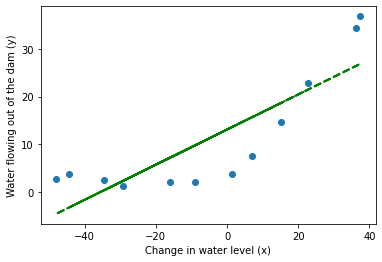

In [13]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = utils.trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)
plt.scatter(X, y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_aug, theta), '--', lw=2,color='g');


In [0]:
def learningCurve(X, y, Xval, yval, lambda_=0):
  m = y.size
  error_train = np.zeros(m)
  error_val = np.zeros(m)

  
  for i in range(1,m+1):
    x_train, y_train = X[:i, :], y[:i]
    theta = utils.trainLinearReg(linearRegCostFunction, x_train, y_train, lambda_)
    
    error_train[i-1] = linearRegCostFunction(x_train, y_train, theta, lambda_=0)[0]
    error_val[i-1]   = linearRegCostFunction(Xval, yval, theta, lambda_=0)[0] 
  return error_train, error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


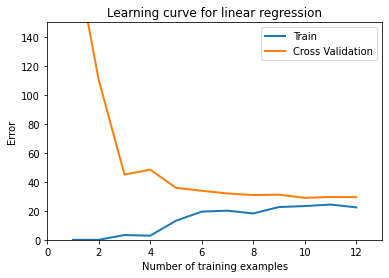

In [15]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [16]:
grader[3] = learningCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  70 / 100 |  



In [0]:
def polyFeatures(X, p):
  X_poly = np.zeros((X.shape[0], p))
  m = X.shape[0]
  for i in range(1,p+1):
    X_poly[:,i-1] = (X**i).reshape(m)
  return X_poly

In [18]:
p = 8
# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = utils.featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

In [19]:
grader[4] = polyFeatures
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |  10 /  10 | Nice work!
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |  80 / 100 |  



Polynomial Regression (lambda = 0.500000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.024374	143.397515
  	3		0.869719	7.379848
  	4		0.433276	8.562161
  	5		0.346604	8.538791
  	6		0.283844	10.257776
  	7		0.817735	6.171751
  	8		0.811116	5.597154
  	9		1.006503	6.263652
  	10		0.926082	5.954859
  	11		0.842517	5.996816
  	12		1.308184	4.268432


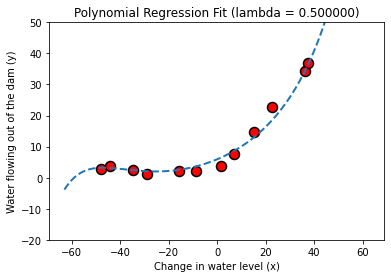

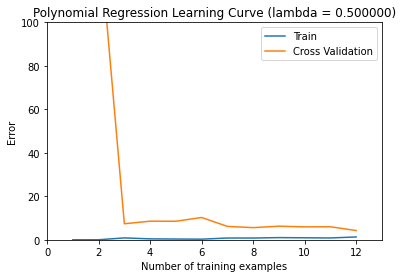

In [20]:
lambda_ = 0.5
theta = utils.trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

utils.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))


In [0]:
def validationCurve(X, y, Xval, yval):
  lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

  error_train = np.zeros(len(lambda_vec))
  error_val = np.zeros(len(lambda_vec))

  i = 0
  for lambda_ in lambda_vec:
    theta = utils.trainLinearReg(linearRegCostFunction, X, y, lambda_)
    
    error_train[i] = linearRegCostFunction(X, y, theta, lambda_=0)[0]
    error_val[i]   = linearRegCostFunction(Xval, yval, theta, lambda_=0)[0] 
    
    i += 1

  return lambda_vec, error_train, error_val

lambda		Train Error	Validation Error
 0.000000	0.028913	55.150728
 0.001000	0.112678	9.844009
 0.003000	0.170887	16.289430
 0.010000	0.221452	16.953159
 0.030000	0.281859	12.827342
 0.100000	0.459320	7.586981
 0.300000	0.921786	4.636751
 1.000000	2.076200	4.260602
 3.000000	4.901377	3.822922
 10.000000	16.092273	9.945554


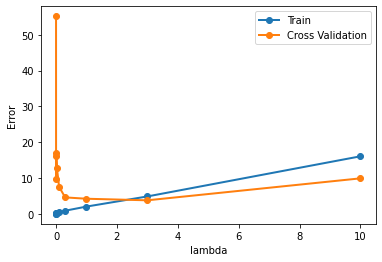

In [25]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In [26]:
grader[5] = validationCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (advaith.maddipatla@gmail.com)? (Y/n): Y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |  10 /  10 | Nice work!
                           Validation Curve |  20 /  20 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

